In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
experiment_dir = 'E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2'

In [2]:
def collect_experiment_dicts(target_dir, test_flag=False):
    experiment_dicts = dict()
    for subdir, dir, files in os.walk(target_dir):
        for file in files:
            filepath = None
            if not test_flag:
                if file == 'summary.csv':
                    filepath = os.path.join(subdir, file)
                    print(subdir)
                    print(filepath)
            
            elif test_flag:
                if file == 'test_summary.csv':
                    filepath = os.path.join(subdir, file)
            
            if filepath is not None:
                
                with open(filepath, 'r') as read_file:
                    lines = read_file.readlines()
                current_experiment_dict = {key: [] for key in lines[0].replace('\n', '').split(',')}
                idx_to_key = {idx: key for idx, key in enumerate(lines[0].replace('\n', '').split(','))}
#                 print(lines)  # ['train_acc,train_loss,val_acc,val_loss\n', '\n', '0.034063157894736844,4.360666,0.0644,4.049858\n', '\n']
                for i in lines:
                    if i == '\n':
                        lines.remove(i)
#                 print(lines)
#                 for line in lines:
#                     line = line.strip('\n')
#                 print(lines)
                for line in lines[1:]:
                    line = line.strip('\n')
                    for idx, value in enumerate(line.replace('\n', '').split(',')):
                        current_experiment_dict[idx_to_key[idx]].append(float(value))
                
                experiment_dicts[subdir.split('\\')[-2]] = current_experiment_dict
                
    return experiment_dicts
                
            

In [3]:
result_dict = collect_experiment_dicts(target_dir=experiment_dir)
for key, value in result_dict.items():
    print(key, list(value.keys()))

E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_07\result_outputs
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_07\result_outputs\summary.csv
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_08\result_outputs
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_08\result_outputs\summary.csv
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_08_experiment1\result_outputs
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_08_experiment1\result_outputs\summary.csv
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_37\result_outputs
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_37\result_outputs\summary.csv
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_38\result_outputs
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_38\result_outputs\summary.csv
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_38_experiment1\result_outputs
E:/notebook/m

In [4]:
result_dict['VGG_38_experiment3_7']

{'train_acc': [0.04109473684210527,
  0.07797894736842106,
  0.11880000000000002,
  0.17122105263157894,
  0.21854736842105263,
  0.25905263157894737,
  0.29252631578947363,
  0.3236631578947369,
  0.3505263157894737,
  0.3743578947368421,
  0.39621052631578946,
  0.4091578947368421,
  0.42724210526315787,
  0.4465263157894737,
  0.45707368421052635,
  0.46896842105263153,
  0.4809052631578947,
  0.49128421052631577,
  0.5034947368421052,
  0.508778947368421,
  0.5204631578947368,
  0.5311368421052632,
  0.5365684210526316,
  0.5452,
  0.554084210526316,
  0.5583368421052632,
  0.5672842105263156,
  0.5746315789473684,
  0.5797473684210526,
  0.5851999999999999,
  0.5917052631578946,
  0.5970105263157894,
  0.603178947368421,
  0.6113473684210526,
  0.6165684210526315,
  0.6220842105263158,
  0.626,
  0.6302947368421052,
  0.636063157894737,
  0.6374526315789473,
  0.6473894736842105,
  0.6490105263157894,
  0.6507578947368421,
  0.6575368421052632,
  0.6638947368421053,
  0.6695157894

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_result_graphs(plot_name, stats, keys_to_plot, notebook=True):
    
    name = 'VGG_38'
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    
    ax_1.set_xlabel('Epoch number')
    
    ax_1.set_ylim([0.0,5.0]) 
#     ax_1.set_yticks([0.1,0.3, 0.5, 0.7, 0.9])
    ax_1.set_ylabel('Loss')
    
    ax_2=ax_1.twinx()
    ax_2.set_ylim([0.0, 1.0])
    ax_2.set_ylabel('Accuracy')
    
    kname = keys_to_plot

    item1 = stats[kname]['train_loss']
    lns1 = ax_1.plot(np.arange(0, len(item1)), 
              item1, label='{}_{}'.format(name, 'train_loss'),color='tomato')

    item2 = stats[kname]['val_loss']
    lns2 = ax_1.plot(np.arange(0, len(item2)), 
              item2, label='{}_{}'.format(name, 'val_loss'),color='cornflowerblue')

    item3 = stats[kname]['train_acc']
    lns3 = ax_2.plot(np.arange(0, len(item3)), 
              item3, label='{}_{}'.format(name, 'train_acc'),color='grey')

    item4 = stats[kname]['val_acc']
    lns4 = ax_2.plot(np.arange(0, len(item4)), 
              item4, label='{}_{}'.format(name, 'val_acc'),color='mediumpurple')


    # 图例控制
    lns = lns1 + lns2 + lns3 + lns4
    labs = [l.get_label() for l in lns]
    ax_1.legend(lns, labs, loc=0, fontsize=10)
    
    
#     fig_1.savefig('../data/{}_loss_performance.pdf'.format(kname), dpi=None, facecolor='w', edgecolor='w',
#     orientation='portrait', papertype=None, format='pdf',
#     transparent=False, bbox_inches=None, pad_inches=0.1,
#     frameon=None, metadata=None)
    
   

c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


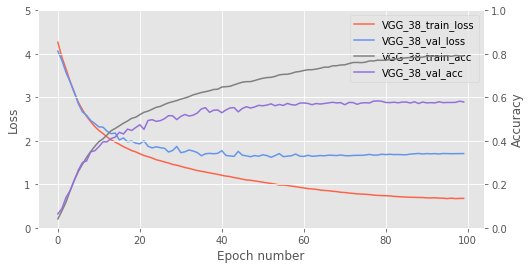

In [6]:
plot_result_graphs('task3_3_model', result_dict, keys_to_plot='VGG_38_experiment3_7')

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_result_graphs(plot_name, stats, keys_to_plot, notebook=True):
    
    kname = 'VGG_38'
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_loss', 'val_loss']:
            item = stats[name][k]
            ax_1.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(kname, k))
            
    ax_1.legend(loc=0)
    ax_1.set_ylabel('Loss')
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_acc', 'val_acc']:
            item = stats[name][k]
            ax_2.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(kname, k))
            
    ax_2.legend(loc=0)
    ax_2.set_ylabel('Accuracy')
    ax_2.set_xlabel('Epoch number')
    
#     fig_1.savefig('../data/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format='pdf',
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)
    
#     fig_2.savefig('../data/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format='pdf',
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)
    

c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument

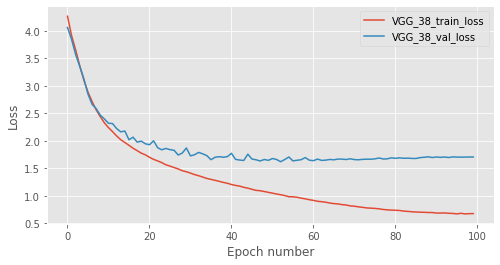

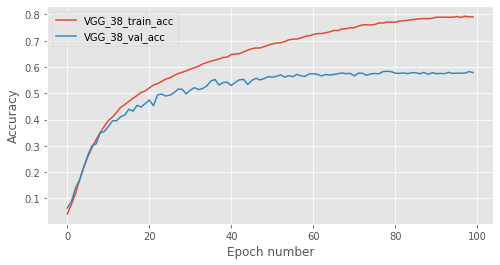

In [18]:
plot_result_graphs('experiment3_7', result_dict, keys_to_plot=['VGG_38_experiment3_7'])